# Visualize Ticker Features

This notebook loads and visualizes the features for a single ticker.

,Open,High,Low,Close,Volume,Volume_Prev,Dividends,Stock Splits,RSI,MACD,...,BB_Lower,BB_Middle,BB_Pband,SMA_20,SMA_50,SMA_100,SMA_200,EMA_100,EMA_200,analyst_targets
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-04,135.384958,136.575399,133.829682,134.904938,1524800,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2020-06-05,135.874546,136.738576,133.781664,135.375320,1947800,1524800.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2020-06-08,133.445621,135.701722,132.168766,135.653717,1747300,1947800.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2020-06-09,135.250518,136.124143,132.936816,133.253632,1622500,1747300.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2020-06-10,133.685690,135.576972,133.205670,134.319321,1731100,1622500.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-29,165.919998,167.789993,165.110001,167.139999,2450400,1723700.0,0.0,0.0,61.396919,2.637913,...,152.241722,160.549500,0.896646,160.549500,157.281230,161.760570,171.158236,162.197851,166.635637,None
2025-05-30,166.919998,169.789993,165.339996,168.630005,5467800,2450400.0,0.0,0.0,63.200207,2.895774,...,152.504120,161.198500,0.927374,161.198500,157.389845,161.824168,171.090347,162.325221,166.655481,None
2025-06-02,167.820007,169.479996,166.259995,169.419998,2550100,5467800.0,0.0,0.0,64.156248,3.127821,...,152.586073,161.797500,0.913752,161.797500,157.526019,161.869931,171.003756,162.465711,166.682989,None


Sector for ZTS: Healthcare


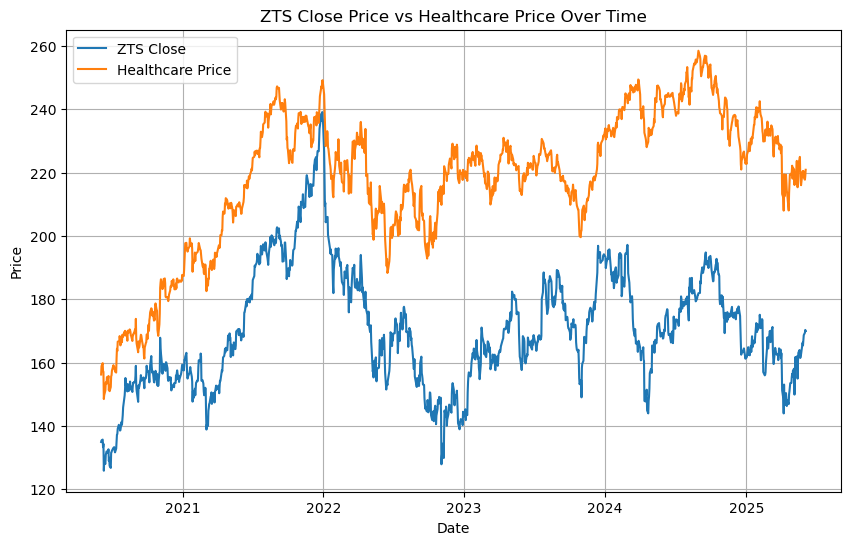

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# Load the ticker's features from the Parquet file
ticker = 'ZTS'  # Change this to the desired ticker
df = pd.read_parquet(f'../data/ticker_features/{ticker}_features.parquet')

# Display the last few rows
display(df)

# Load the sector mapping from JSON
with open('../data/market_features/sector_mapping.json', 'r') as f:
    sector_dict = json.load(f)

# Get the sector for the ticker
sector = sector_dict.get(ticker, 'Unknown')
print(f"Sector for {ticker}: {sector}")

# Load the sector's Parquet file
sector_df = pd.read_parquet(f'../data/market_features/sectors/{sector}.parquet')

# Plot the ticker's 'Close' price over time
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label=f'{ticker} Close')

# Overlay the sector's 'price' data
plt.plot(sector_df.index, sector_df['price'], label=f'{sector} Price')

plt.title(f'{ticker} Close Price vs {sector} Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()